In [19]:
import nltk
from nltk import word_tokenize
from matplotlib import pyplot as plt
from wordcloud import WordCloud
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/shreeyachand/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
import pandas as pd
import datetime

In [6]:
# read in Instagram post data from previous notebook
df = pd.read_csv('ig posts 6-19.csv', index_col=0)[['Candidate','Caption','Timestamp','Shortcode']]
df

,Candidate,Caption,Timestamp,Shortcode
0,Karen Camper,Join me at this powerful event on wealth build...,1677609141,CpN1vcNOAiD
1,Karen Camper,None,1668147197,Ckz2g-qu27_
2,Karen Camper,None,1667877625,Ckr0WNoObun
3,Karen Camper,Thanks President Biden for bringing down fuel ...,1667400632,CkdmjjcubKU
4,Karen Camper,Please keep the family of Rep Barbara Cooper i...,1667089022,CkUUNLZubhU
...,...,...,...,...
1098,Reggie Hall,None,1681861416,CrMkT7NOeRN
1099,Reggie Hall,None,1679934727,CqTJcXbun-W
1100,Reggie Hall,None,1679931087,CqTCgCtOhrk
1101,Reggie Hall,Whitehaven you’re up next. Please join us as w...,1678207881,Cpfrv2JOyv3


In [1]:
# the client wanted posts before a certain date, and within a ten-year time frame
def timing(t):
    post = datetime.datetime.fromtimestamp(t)
    before = datetime.datetime(2022, 5, 23)
    after = datetime.datetime(2012, 5, 23)
    return post <= before and post >= after

In [9]:
# read in Tweets from previous notebook
df_tw = pd.read_csv('tweets.csv',index_col=0)

In [14]:
df_tw[df_tw['Date'] < '2022-05-23']

,Candidate,Caption,Date,URL
4996,Joe Brown,Negroes wanting Trump to go to jail as their p...,2022-05-22 21:25:28+00:00,https://twitter.com/JudgeJoeBrownTV/status/152...
4997,Joe Brown,@WatsonSpeaking @blackdetta @vanz1965 @BryceRi...,2022-05-22 21:21:07+00:00,https://twitter.com/JudgeJoeBrownTV/status/152...
4998,Joe Brown,AMEN … so true,2022-05-22 21:18:12+00:00,https://twitter.com/JudgeJoeBrownTV/status/152...
4999,Joe Brown,Leave the plantation\n\nThe gates aren’t locke...,2022-05-21 21:06:24+00:00,https://twitter.com/JudgeJoeBrownTV/status/152...
5000,Joe Brown,@gregorykingjr @WatsonSpeaking @IamjustTerry @...,2022-05-21 21:06:05+00:00,https://twitter.com/JudgeJoeBrownTV/status/152...
...,...,...,...,...
72258,Joe Brown,@veritas0731 That was horrible. But do you rea...,2018-09-27 23:08:39+00:00,https://twitter.com/JudgeJoeBrownTV/status/104...
72259,Joe Brown,@AgainstDenial @NathanSifuHD @TwitterSafety @b...,2018-09-27 23:06:28+00:00,https://twitter.com/JudgeJoeBrownTV/status/104...
72260,Joe Brown,@Kingpin_202 Not any place where I can do one ...,2018-09-27 22:52:08+00:00,https://twitter.com/JudgeJoeBrownTV/status/104...
72261,Joe Brown,@Kingpin_202 Got it !,2018-09-27 22:51:28+00:00,https://twitter.com/JudgeJoeBrownTV/status/104...


In [14]:
# add boolean column for whether data is within the requested time period
df['Timing'] = df['Timestamp'].apply(timing)

In [19]:
# analyze which candidates we lose data for when restricting the date for posts
df[df['Timing']].groupby('Candidate').count()['Timing']

Candidate
Karen Camper           63
Michelle McKissack    166
Van Turner            482
Name: Timing, dtype: int64

In [18]:
df.groupby('Candidate').count()['Timing']

Candidate
Karen Camper           72
Michelle McKissack    209
Paul Young             88
Reggie Hall            14
Van Turner            720
Name: Timing, dtype: int64

In [28]:
# new dataframe for posts within intended time period
df_t = df[df['Timing']]

In [91]:
df_tw.drop_duplicates(inplace=True)

In [22]:
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords_list = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shreeyachand/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
# create a large list of stopwords from multiple sources to omit from word clouds
stop = []
with open('stopwords.txt') as f:
    lines = f.readlines()
    for line in lines:
        word = line.strip('\n')
        if word not in stopwords_list and word not in stop:
            stop.append(word)
    
with open('stopwords-en.txt') as f:
    lines = f.readlines()
    for line in lines:
        word = line.strip('\n')
        if word not in stopwords_list and word not in stop:
            stop.append(word)
stopwords_list.extend(stop)

In [ ]:
# create word clouds for candidates, irrespective of date
for cand in set(df['Candidate']):
    caps = ""
    py = df[df['Candidate'] == cand]
    for row in py['Caption']:
        caps += row + ' '
        caps = caps.encode('utf-8').decode('utf-8')
        words = word_tokenize(caps)
        words_no_punc = []
    for word in words:
        if word.isalpha():
            words_no_punc.append(word.lower())
    clean_words = []
    for word in words_no_punc:
        if word not in stopwords_list:
            clean_words.append(word)
            clean_words_string = " ".join(clean_words)
    wordcloud = WordCloud(width=800, height=400).generate(clean_words_string)
    wordcloud.to_file(cand+'-wordcloud-alldate.png')

In [42]:
# create word clouds for candidates, incl. only posts within intended time period
for cand in set(df_t['Candidate']):
    caps = ""
    py = df_t[df_t['Candidate'] == cand]
    for row in py['Caption']:
        caps += row + ' '
        caps = caps.encode('utf-8').decode('utf-8')
        words = word_tokenize(caps)
        words_no_punc = []
    for word in words:
        if word.isalpha():
            words_no_punc.append(word.lower())
    clean_words = []
    for word in words_no_punc:
        if word not in stopwords_list:
            clean_words.append(word)
            clean_words_string = " ".join(clean_words)
    wordcloud = WordCloud(width=800, height=400).generate(clean_words_string)
    wordcloud.to_file(cand+'-wordcloud.png')

In [179]:
# create word clouds for candidates with only Twitter accounts
for cand in ['Joe Brown','Frank Colvett']:
    caps = ""
    # since Joe Brown had a huge number of tweets, when I ran this cell for his tweets I took a random sample of 1000 
    py = df_tw[df_tw['Candidate'] == cand]
    for row in py['Caption']:
        caps += row + ' '
        caps = caps.encode('utf-8').decode('utf-8')
        words = word_tokenize(caps)
        words_no_punc = []
    for word in words:
        if word.isalpha():
            words_no_punc.append(word.lower())
    clean_words = []
    for word in words_no_punc:
        if word not in stopwords_list:
            clean_words.append(word)
            clean_words_string = " ".join(clean_words)
    wordcloud = WordCloud(width=800, height=400).generate(clean_words_string)
    wordcloud.to_file(cand+'-wordcloud-alldate.png')

In [29]:
# the following cells are an example of the creation of a single word cloud
caps = ""
py = df_t[df_t['Candidate'] == "Van Turner"]
for row in py['Caption']:
    caps += row + ' '

In [30]:
words = word_tokenize(caps)

In [31]:
words_no_punc = []
for word in words:
    if word.isalpha():
        words_no_punc.append(word.lower())
clean_words = []
for word in words_no_punc:
    if word not in stopwords_list:
        clean_words.append(word)
        clean_words_string = " ".join(clean_words)

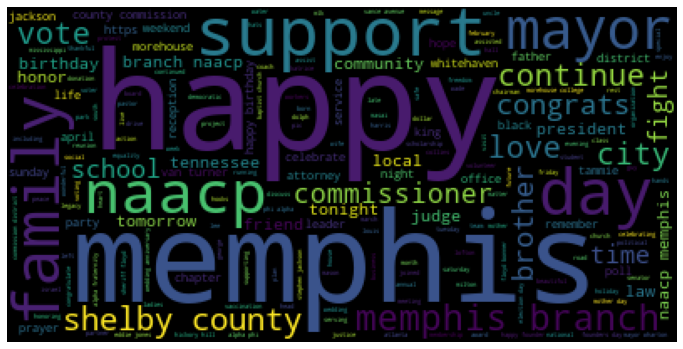

In [32]:
wordcloud = WordCloud().generate(clean_words_string)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [140]:
# creating a dictionary of keywords for each policy issue
budget_key = 'budget, funding, healthcare, health care, business owner, public contract, youth, social program, health'.split(', ')
school_key = 'school, college, teacher, education, curriculum, district, testing, student, proficiency, standardized, test, mental health, instruction, voucher, restorative, music, educator'.split(', ')
crime_key = 'crime, safety, guns, police, justice, security, surveillance, mental health, healthcare, homeless, shelter, marijuana, decriminaliz, officer, misconduct, prison, sentencing, weed'.split(', ')
labor_key = 'labor, wage, employee, PILOT, insurance, temporary service,  TIF, TIF , tax, company, companies, subsidies, subsidy, fund'.split(', ')
housing_key = 'nimby, house, housing, home, units, rent, lease, afford, market, property, ownership, shortage, homeless, shelter, income, structure, code, landlord'.split(', ')
key_dict = dict()
key_dict['Memphis City Budget'] = budget_key
key_dict['Public Education'] = school_key
key_dict['Crime and Safety'] = crime_key
key_dict['Labor and Wages'] = labor_key
key_dict['Affordable Housing'] = housing_key

In [172]:
key_caps = pd.DataFrame(columns={'Candidate','Caption','Post Date','URL','# Keywords','Keyword Types','Notes','Words'})[['Candidate','Caption','Post Date','URL','# Keywords','Keyword Types','Notes','Words']]

In [173]:
# convert date from unix timestamp to string format
def convert_date(t):
    date = datetime.datetime.fromtimestamp(t)
    out = str(date.year)+'-'+str(date.month)+'-'+str(date.day)
    return out

In [174]:
# search each IG post for keywords
for n in range(len(df)):
    post = df.loc[n]
    num_words = 0
    types = set()
    words = []
    for key in key_dict.keys():
        for word in key_dict[key]:
            if word in post['Caption'].lower():
                num_words += 1
                words.append(word)
                types.add(key)
    # must have more than one of the keywords to be considered
    if num_words > 1: 
        date = convert_date(post['Timestamp'])
        in_time = timing(post['Timestamp'])
        key_caps.loc[len(key_caps)] = [post['Candidate'],post['Caption'],date,'https://www.instagram.com/p/' + post['Shortcode'],num_words,types,'within intended time period: '+str(in_time),words]

In [143]:
key_caps2 = pd.DataFrame(columns={'Candidate','Caption','Post Date','URL','# Keywords','Keyword Types','Words'})[['Candidate','Caption','Post Date','URL','# Keywords','Keyword Types','Words']]

In [144]:
# search each Tweet for keywords
for n in range(len(df_tw)):
    post = df_tw.loc[n]
    num_words = 0
    types = set()
    words = []
    for key in key_dict.keys():
        for word in key_dict[key]:
            if word in post['Caption'].lower():
                num_words += 1
                words.append(word)
                types.add(key)
    if num_words > 2: 
        date = post['Date'].split(" ")[0]
        key_caps2.loc[len(key_caps2)] = [post['Candidate'],post['Caption'],date,post['URL'],num_words,types,words]

In [145]:
# omit Tweets that are clearly replies (typically do not have as much value)
def reply(s):
    return s[0] == "@"

In [146]:
key_caps2['Reply'] = key_caps2['Caption'].apply(reply)
key_caps2 = key_caps2[key_caps2['Reply'] == False]

In [150]:
key_caps.sort_values('Post Date').sort_values('# Keywords',ascending=False).reset_index()

,index,Candidate,Caption,Post Date,URL,# Keywords,Keyword Types,Notes,Words
0,13,Van Turner,I just had a great tour of Professional Allied...,2023-5-16,https://www.instagram.com/p/CsUgr1wyrBN,9,"{Public Education, Affordable Housing, Crime a...",within intended time period: False,"[healthcare, health, school, education, studen..."
1,15,Van Turner,"Over the weekend, I had an opportunity to sit ...",2022-9-18,https://www.instagram.com/p/Ciq3iXBMvQl,8,"{Memphis City Budget, Crime and Safety, Public...",within intended time period: False,"[funding, school, teacher, education, district..."
2,35,Paul Young,I appreciate the opportunity to moderate today...,2023-3-18,https://www.instagram.com/p/Cp8xAxDtgPX,7,"{Memphis City Budget, Crime and Safety, Public...",within intended time period: False,"[youth, health, mental health, music, crime, m..."
3,1,Michelle McKissack,"Today, I’m calling on our Shelby County Commis...",2023-4-12,https://www.instagram.com/p/Cq8Dm5sg1Go,6,"{Crime and Safety, Public Education, Affordabl...",within intended time period: False,"[school, district, student, safety, house, rent]"
4,36,Paul Young,Currently the President/CEO of the Downtown Me...,2023-1-16,https://www.instagram.com/p/CnfM7grP-6Y,6,"{Crime and Safety, Public Education, Affordabl...",within intended time period: False,"[music, crime, housing, rent, afford, structure]"
5,3,Michelle McKissack,So thankful ALL students at Cummings K-8 Optio...,2022-8-15,https://www.instagram.com/p/ChSqrUlJRNe,5,"{Crime and Safety, Public Education, Affordabl...",within intended time period: False,"[school, district, student, police, rent]"
6,20,Van Turner,My friend Adrienne Cater posted this 3 years a...,2022-2-6,https://www.instagram.com/p/CZowCCVs9Ss,5,"{Public Education, Affordable Housing}",within intended time period: True,"[school, college, education, student, house]"
7,14,Van Turner,Let’s all stand with Teamsters Local 667 who a...,2023-4-13,https://www.instagram.com/p/Cq_WAgByPi0,5,"{Labor and Wages, Crime and Safety, Public Edu...",within intended time period: False,"[testing, test, safety, justice, wage]"
8,11,Van Turner,I will caption this one myself: I’m ready to ...,2023-6-8,https://www.instagram.com/p/CtPAt2Gy-Gd,5,"{Labor and Wages, Crime and Safety, Public Edu...",within intended time period: False,"[school, safety, prison, fund, structure]"
9,31,Van Turner,Family: One of the greatest honors of my life ...,2020-3-23,https://www.instagram.com/p/B-F7-7iFaUl,4,"{Crime and Safety, Public Education, Affordabl...",within intended time period: True,"[district, test, shelter, shelter]"


In [160]:
key_caps2.drop(['level_0','index'],axis=1,inplace=True)

In [162]:
key_caps2.drop(['Reply'],axis=1,inplace=True)

In [165]:
key_caps.to_csv('IG POSTS FINAL.csv')
key_caps2.to_csv('TW POSTS FINAL.csv')